In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Tabela Br 2025.xlsx to Tabela Br 2025 (1).xlsx
User uploaded file "Tabela Br 2025 (1).xlsx" with length 10381 bytes


In [ ]:
import pandas as pd

df = pd.read_excel('Tabela Br 2025.xlsx')
display(df.head(25))

,Classificação,Clubes,P,J,V,E,D,GP,GC,SG,%
0,1,Palmeiras,62,29,19,5,5,53,26,27,71
1,2,Flamengo,61,29,18,7,4,56,16,40,70
2,3,Cruzeiro,57,30,16,9,5,42,21,21,63
3,4,Mirassol,55,30,15,10,5,52,31,21,61
4,5,Bahia,49,30,14,7,9,40,34,6,54
5,6,Botafogo,47,30,13,8,9,41,28,13,52
6,7,Fluminense,44,29,13,5,11,36,35,1,50
7,8,Vasco,42,30,12,6,12,49,41,8,46
8,9,São Paulo,41,30,11,8,11,33,33,0,45
9,10,Corinthians,39,30,10,9,11,32,35,-3,43


# **Análise de dados da Tabela do Brasileirão Betano 2025 (data da tabela: 27/10)**

## Relação de vitórias, Derrotas e Empates do time (via input)

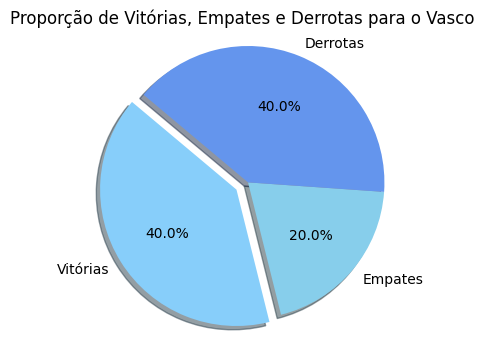

In [ ]:
import matplotlib.pyplot as plt

# @title Insira o nome do time:
team_name = "Vasco" #@param {type:"string"}

# Filtra tabela
team_df = df[df['Clubes'] == team_name]

# Verifica time
if team_df.empty:
    print(f"Time '{team_name}' não encontrado na tabela.")
else:
    # Dados Time
    vitorias = team_df['V'].sum()
    empates = team_df['E'].sum()
    derrotas = team_df['D'].sum()

    # Criar os dados para o gráfico de pizza
    labels = ['Vitórias', 'Empates', 'Derrotas']
    sizes = [vitorias, empates, derrotas]
    colors = ['lightskyblue', 'skyblue', 'cornflowerblue'] # Updated to blue shades
    explode = (0.1, 0, 0)  # explode 1st slice (Vitórias)

    # Criar o gráfico de pizza
    plt.figure(figsize=(4, 4))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(f'Proporção de Vitórias, Empates e Derrotas para o {team_name}')
    plt.show()

# Gráfico de Gols Pró

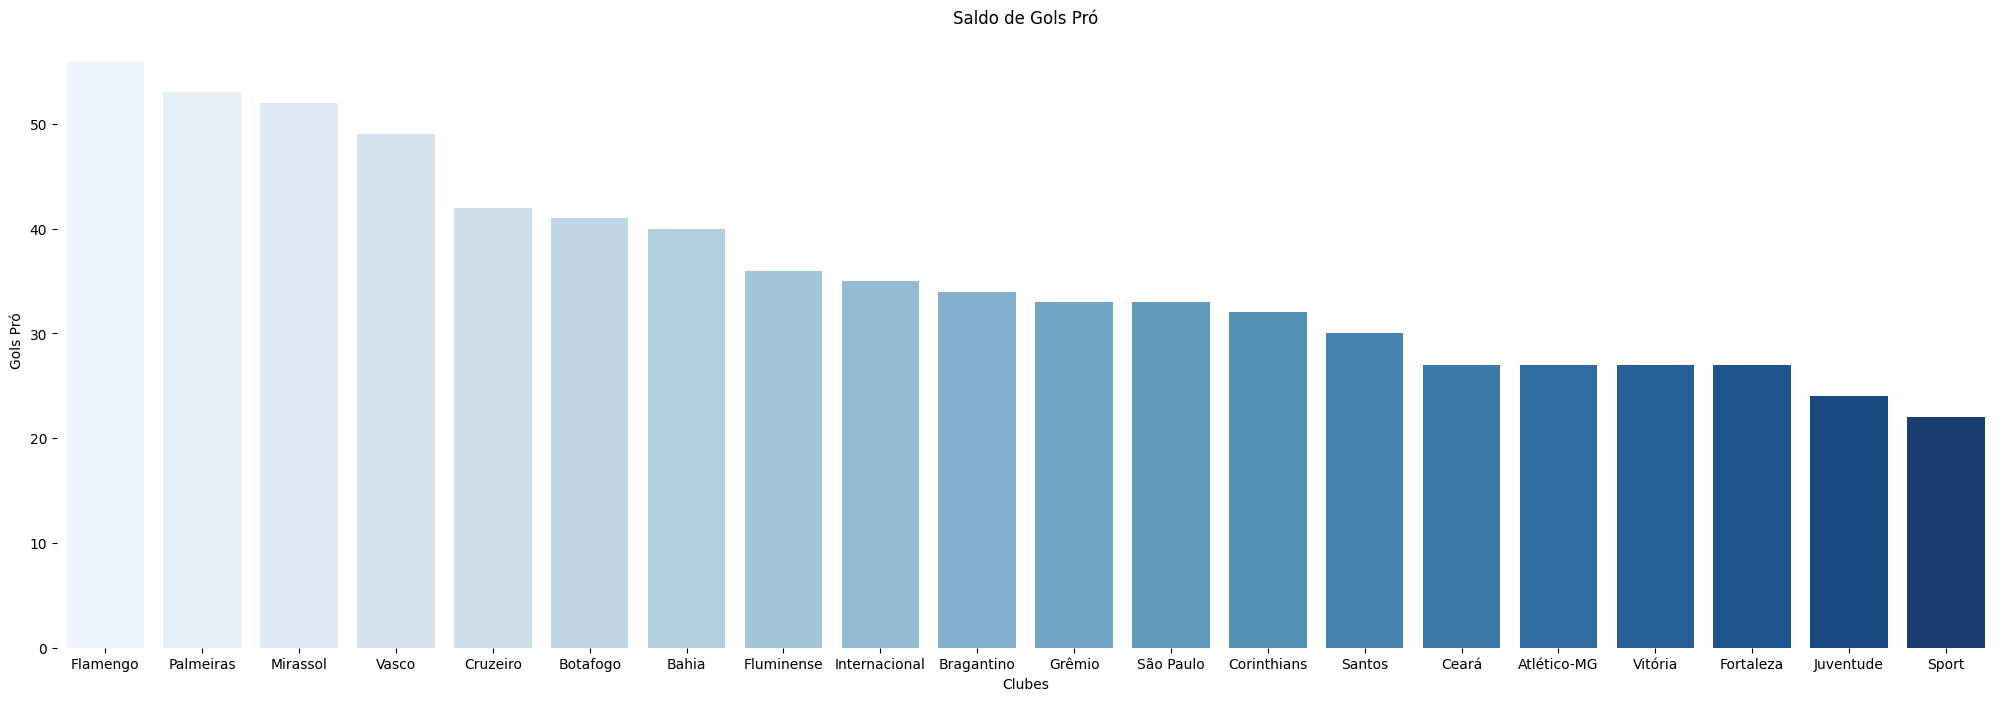

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (25,8))
plt.title('Saldo de Gols Pró')
sns.barplot(x='Clubes', y ='GP', data = df.sort_values('GP', ascending=False), hue='Clubes', palette='Blues', legend=False)
plt.xlabel('Clubes')
plt.ylabel('Gols Pró')

#remover as molduras
ax = plt.gca() # Obtém os eixos atuais

for spine in ax.spines.values():
    spine.set_visible(False)

# Times que mais tomaram gols

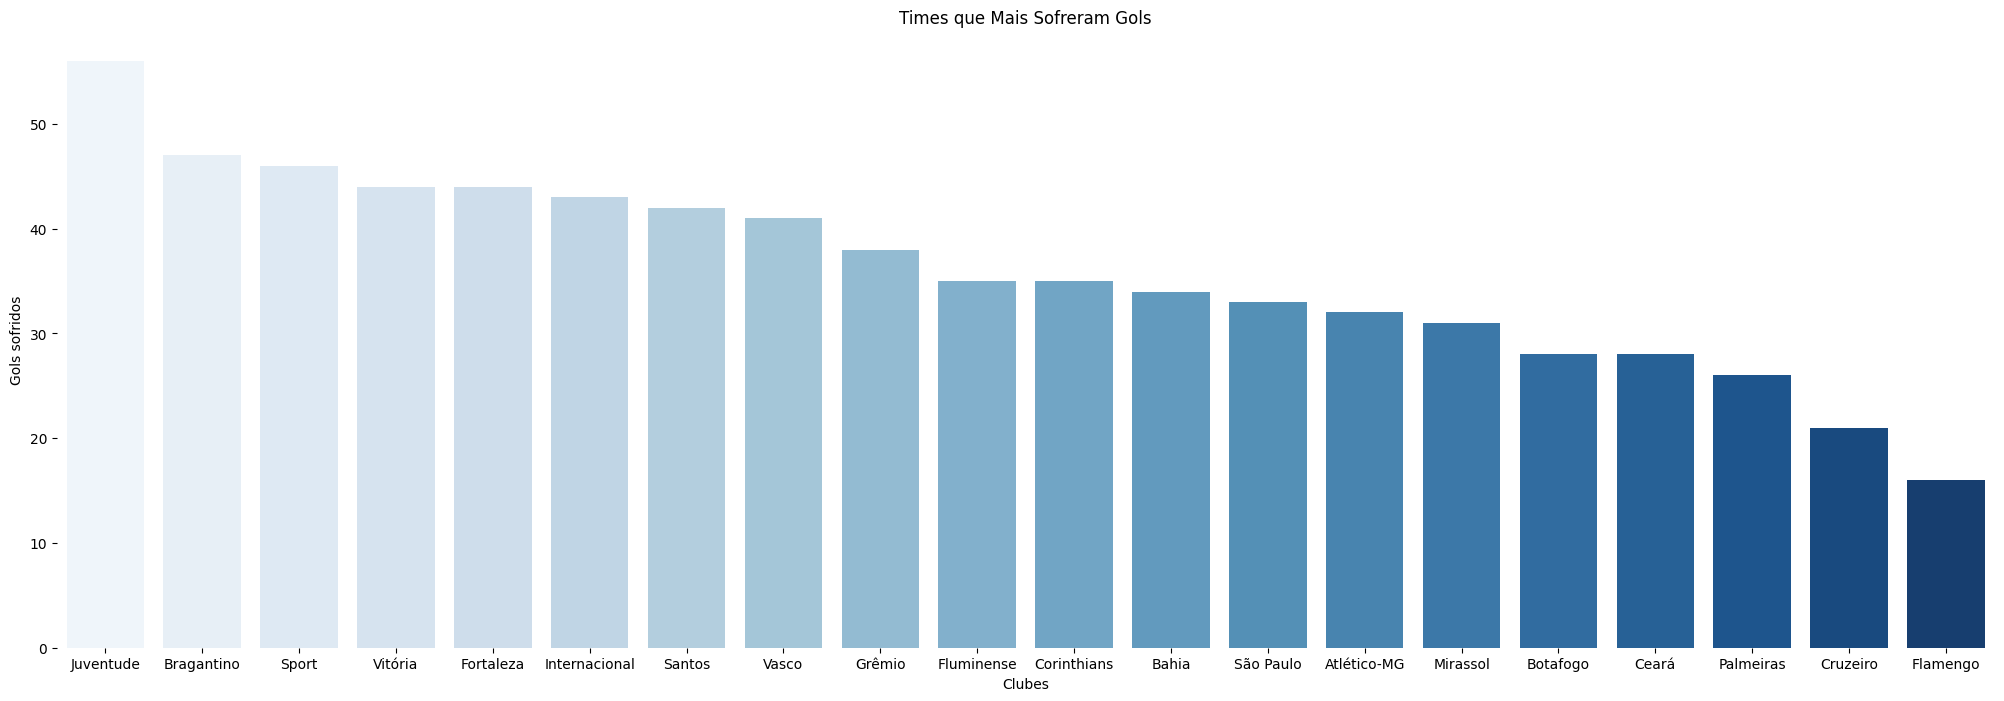

In [ ]:
plt.figure(figsize = (25, 8))
sns.barplot(x='Clubes', y ='GC', data = df.sort_values('GC', ascending=False), hue='Clubes', palette='Blues', legend=False)
plt.title('Times que Mais Sofreram Gols')
plt.xlabel('Clubes')
plt.ylabel('Gols sofridos')

#remover as molduras
ax = plt.gca() # Obtém os eixos atuais

for spine in ax.spines.values():
    spine.set_visible(False)

# Gráfico de Saldo de Gols

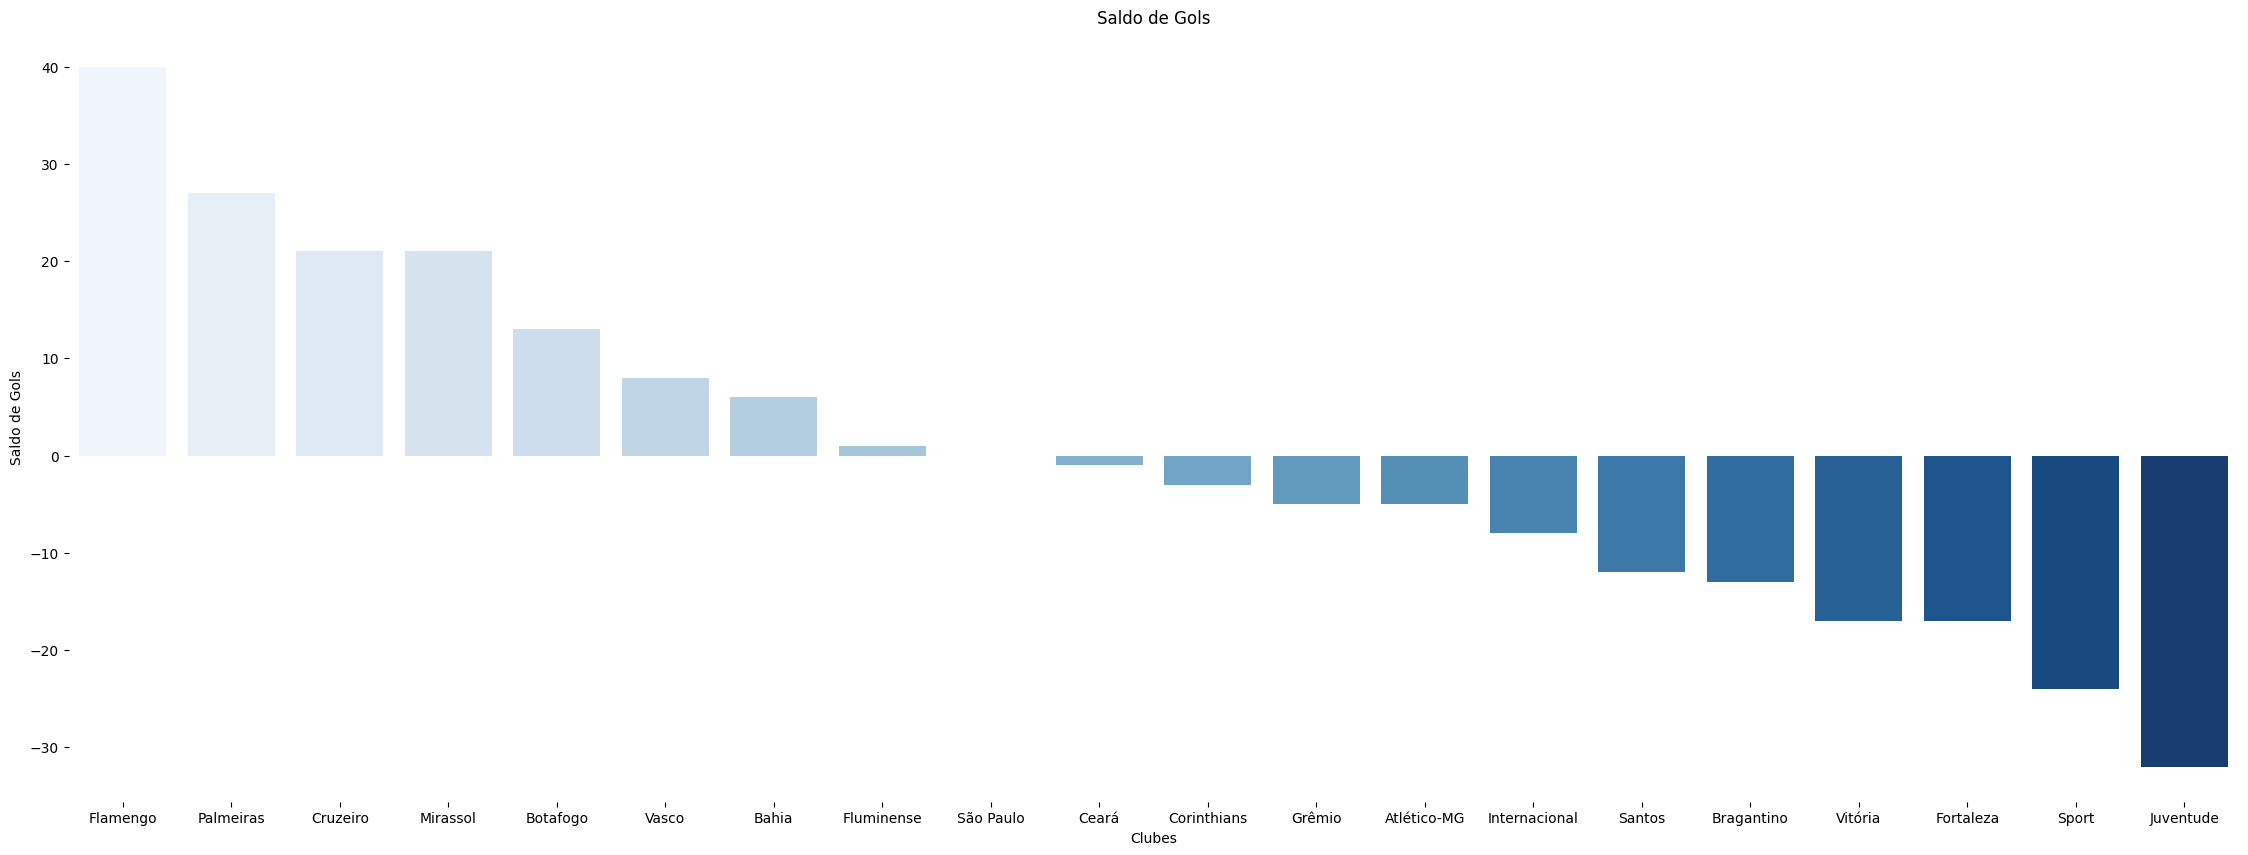

In [ ]:
plt.figure(figsize = (28, 10))
sns.barplot(x='Clubes', y ='SG', data = df.sort_values('SG', ascending=False), hue='Clubes', palette='Blues', legend=False)
plt.title('Saldo de Gols')
plt.xlabel('Clubes')
plt.ylabel('Saldo de Gols')

#remover as molduras
ax = plt.gca() # Obtém os eixos atuais

for spine in ax.spines.values():
    spine.set_visible(False)

# Análise dos times que mais empatam

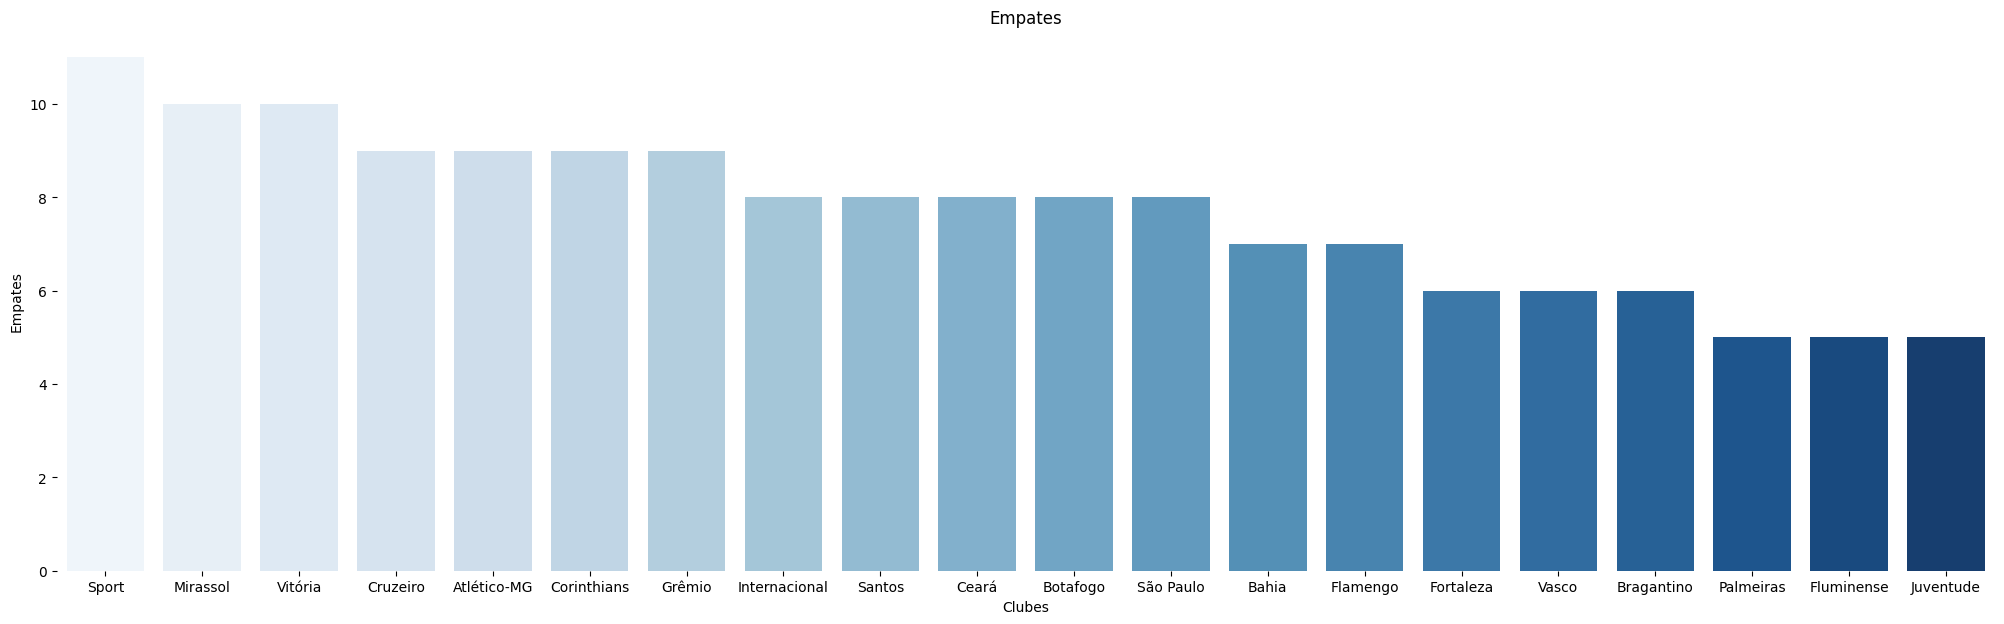

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assumindo que 'df' está carregado

plt.figure(figsize = (25, 7))
sns.barplot(x='Clubes', y ='E', data = df.sort_values('E', ascending=False), hue='Clubes', palette='Blues', legend=False)

plt.title('Empates')
plt.xlabel('Clubes')
plt.ylabel('Empates')

#remover as molduras
ax = plt.gca() # Obtém os eixos atuais

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

# Times que mais tomam gols

In [ ]:
import plotly.express as px
import pandas as pd

df_ordenado = df.sort_values('GC', ascending=False)

fig = px.bar(
    df_ordenado,
    x='Clubes',
    y='GC',
    title='Gols Contra por Clubes (Gráfico de Barras Interativo)',
    color='GC',
    color_continuous_scale=px.colors.sequential.Blues
)

fig.update_layout(
    xaxis_title='Clubes',
    yaxis_title='Gols Contra',
    width=1800,
    height=500,
    # Combine all xaxis properties into one dictionary
    xaxis={'categoryorder':'array', 'categoryarray': df_ordenado['Clubes'], 'showgrid': False},
    yaxis={'showgrid': False},

    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

# Comparação entre times

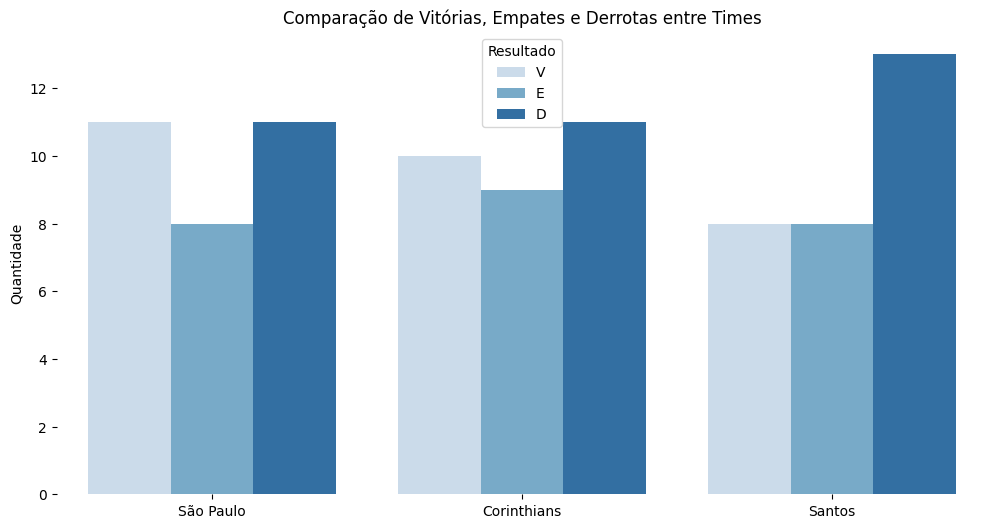

In [ ]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Times_para_Comparar = "São Paulo, Santos, Corinthians" #@param {type:"string"}

Times_para_Comparar = [time.strip() for time in Times_para_Comparar.split(',')]

df_comparacao = df[df['Clubes'].isin(Times_para_Comparar)]

df_melted = df_comparacao.melt(
    id_vars='Clubes',
    value_vars=['V', 'E', 'D'],
    var_name='Resultado',
    value_name='Quantidade'
)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Clubes', y='Quantidade', hue='Resultado', data=df_melted, palette='Blues')
plt.title('Comparação de Vitórias, Empates e Derrotas entre Times')
plt.xlabel('')
plt.ylabel('Quantidade')

#remover as molduras
ax = plt.gca() # Obtém os eixos atuais

for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()